In [1]:
import inspect

def retrieve_name(var):
    callers_local_vars = inspect.currentframe().f_back.f_locals.items()
    return [var_name for var_name, var_val in callers_local_vars if var_val is var]

def save_to_pickle(obj, file_name):
    with open(file_name, 'wb') as f:
        pickle.dump(obj, f)
    f.close()

def open_pickle(filename):
    with open(filename, 'rb') as f:
        obj = pickle.load(f)
    return obj

In [2]:
# # !pip install pyLDAvis
# import nltk
# nltk.download('stopwords')
# print("Imported stopwords")
# nltk.download('wordnet')
# print("Imported wordnet")
# nltk.download('punkt')
# print("Imported punkt")

In [3]:
# # Time operation

# # time the process
# tic = time.perf_counter()

# # do something

# # time the process
# toc = time.perf_counter()
# print("The process took {} seconds".format(toc - tic))

# Import NLP Packages

In [4]:
# General Packages
import os
import pickle
import pandas as pd
import numpy as np
import itertools
import time
import math
import re
from pprint import pprint

pd.set_option('display.max_colwidth', 100)

# NLP Packages

# Gensim
import gensim
# import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim import corpora, models
from gensim.models.ldamulticore import LdaMulticore
import pyLDAvis.gensim
from gensim.test.utils import datapath

# SpaCy
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

# NLTK
import nltk as nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import nltk.corpus  
from nltk.text import Text

# string, textblob
from textblob import TextBlob
import string

# ignore warnings
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
# warnings.simplefilter('ignore')

pd.set_option('display.max_colwidth', -1)

C:\Users\pnbutler\Anaconda3\lib\site-packages\nltk\decorators.py:68: DeprecationWarning: `formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly
  regargs, varargs, varkwargs, defaults, formatvalue=lambda value: ""
C:\Users\pnbutler\Anaconda3\lib\site-packages\nltk\lm\counter.py:15: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Sequence, defaultdict
C:\Users\pnbutler\Anaconda3\lib\site-packages\nltk\lm\vocabulary.py:13: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Counter, Iterable
C:\Users\pnbutler\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future v

In [5]:
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

# # navigate to directory with pickle file\
# DATA_PATH = "/content/drive/My Drive/NLP_fp"
DATA_PATH = r"C:\Users\pnbutler\Documents\MSCA\NLP\Final"
os.chdir(DATA_PATH)
os.getcwd()

'C:\\Users\\pnbutler\\Documents\\MSCA\\NLP\\Final'

# **Import data**


In [6]:
# load data
file_name = 'news_chicago_il.pkl'
infile = open(file_name,'rb')
df = pickle.load(infile)

In [7]:
print(df.columns)
df.head(3)

Index(['crawled_date', 'language', 'text', 'title'], dtype='object')


crawled_date language  \
0 2020-05-11    english   
1 2020-05-11    english   
2 2020-05-11    english   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

## Clean Data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177325 entries, 0 to 177324
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   crawled_date  177325 non-null  datetime64[ns]
 1   language      177325 non-null  object        
 2   text          177325 non-null  object        
 3   title         177325 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 5.4+ MB


In [9]:
# filter to english only news
df = df[df['language']=='english']

In [10]:
# drop lanaguage
df = df.drop(columns=["language"])

In [11]:
# Check null - no nulls
df.isnull().sum()

crawled_date    0
text            0
title           0
dtype: int64

##### Check Wordcount

In [12]:
# There are likley more records that we can drop
df[df['text'].str.len() < 5].shape[0]

1228

In [13]:
# Create word count features
df['word_count']= df['text'].apply(lambda x:len(str(x).split(" ")))

In [14]:
df['word_count'].describe()

count    177325.000000
mean     359.707007   
std      518.481187   
min      1.000000     
25%      72.000000    
50%      217.000000   
75%      499.000000   
max      17456.000000 
Name: word_count, dtype: float64

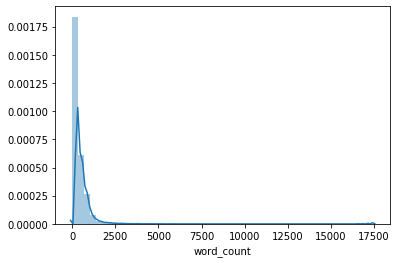

In [15]:
sns.distplot(df.word_count)

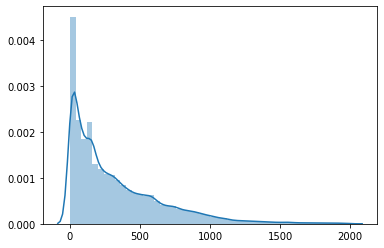

In [16]:
# zoom in
sns.distplot(df.loc[df["word_count"]<2000,["word_count"]])

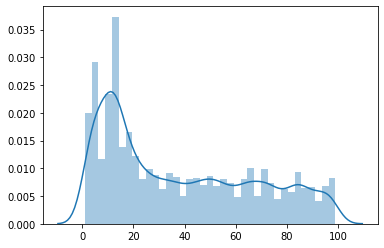

In [17]:
# zoom in further
sns.distplot(df.loc[df["word_count"]<100,["word_count"]])

In [18]:
wc_bins = [0,100,250,500,1000,5000,10000,15000,20000]
bins = pd.cut(x = df['word_count'], bins = wc_bins)
bins.value_counts()

(0, 100]          54645
(100, 250]        40844
(250, 500]        37661
(500, 1000]       33815
(1000, 5000]      10117
(5000, 10000]     183  
(10000, 15000]    49   
(15000, 20000]    11   
Name: word_count, dtype: int64

In [19]:
# sample articles with less than 20 words
df[(df['word_count'] > 2) & (df['word_count'] <= 20)].sample(5)

crawled_date  \
72236  2020-01-25     
28395  2020-01-02     
73867  2020-03-22     
122193 2020-02-06     
149571 2020-03-23     

                                                                                                                      text  \
72236   Why do many US.states(New York,Illinois,Connecticut,Texas,New Jersy) have very hard tax burden on local residents?   
28395   CDL is federal, pot in your system will cost you your CDL.                                                           
73867   MLB Throwback Please welcome the new owner of the Chicago Pirates..                                                  
122193  The Onion: Chicago Adds 90-Story Stack Of Italian Beef To Skyline                                                    
149571  FOLLOW US Facebook Twitter Instagram ©2020 NBC Sports Chicago LLC                                                    

                                                                                                                     title  \
72236   Why do many US.states(New York,Illinois,Connecticut,Texas,New Jersy) have very hard tax burden on local residents?   
28395   new illinois marijuana law question                                                                                  
73867   Please welcome the new owner of the Chicago Pirates..                                                                
122193  The Onion - Chicago Adds 90-Story Stack Of Italian Beef To Skyline                                                   
149571  Happy Birthday to Chicago legend Mark Buehrle!                                                                       

        word_count  
72236   14          
28395   12          
73867   12          
122193  12          
149571  11

In [20]:
df = df[df['word_count'] > 20]

##### Drop duplicates

In [21]:
def drop_named_duplicates_in_col(df, series, values):
    """
    Method to drop specific duplicates row-wise dependent only on values in one column
    
    Parameters:
    --------
    df : dataframe
    series : name of column, represented as a string value
    values : values for which to drop duplicates, represented as list
    
    Returns:
    -------
    df : de-duplicated dataframe
    """
    # remove selected duplicates
    dup_bool = df[series].isin(values)
    df["dup_flag"] = np.where(dup_bool, 1, 0)
    df_0 = df[df["dup_flag"] == 0]
    df_1 = df[df["dup_flag"] == 1]
    df_1 = df_1.drop_duplicates(subset=[series])
    df = pd.concat([df_0, df_1])
    del df_1, df_0
    return df

In [22]:
# find duplicate articles by title
title_counts = pd.DataFrame(df.title.value_counts()).reset_index()
title_counts.columns = ["Title", "Count"]
duplicate_titles_df = title_counts[(title_counts["Count"]>1) & (title_counts["Title"] != "")]
duplicate_titles = list(duplicate_titles_df["Title"])
print("There are {} unique duplicate titles".format(len(duplicate_titles)))

There are 14428 unique duplicate titles


In [23]:
df = drop_named_duplicates_in_col(df, "title", duplicate_titles)

In [24]:
# find duplicate articles by title
text_counts = pd.DataFrame(df.text.value_counts()).reset_index()
text_counts.columns = ["Text", "Count"]
duplicate_text_df = text_counts[(text_counts["Count"]>1)]
duplicate_text = list(duplicate_text_df["Text"])
print("There are {} unique duplicate texts".format(len(duplicate_text)))

There are 1351 unique duplicate texts


In [25]:
df = drop_named_duplicates_in_col(df, "text", duplicate_text)
df.shape

(116735, 5)

##### Filter to relevant articles

In [26]:
#remove all articles that do not mention the words Chicago or Illinois
words = ['illinois','chicago']
%time df = df[df['text'].str.contains('|'.join(words), case = False)]
df.shape 

Wall time: 1.47 s


(97838, 5)

In [27]:
# filter to articles that comment on population
words = ['population','resident','citizen','populace','community', 'town', 'city', 'suburb']
%time df = df[df['text'].str.contains('|'.join(words), case = False)]
df.shape 

Wall time: 15 s


(46444, 5)

##### Clean Text Further

In [28]:
# set cleaning params
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

In [29]:
# clean text
df['text_clean'] = df['text'].map(lambda x: re.sub('[^a-zA-Z0-9 @ . , : - _]', '', str(x)))

In [30]:
# clean further

# apply clean
%time df["text_lemma_clean"] = df['text_clean'].apply(lambda x: clean(x))

Wall time: 59.4 s


In [31]:
# # # get a list of all article contents
# # list_of_text = list(df["text_clean"])

# # # clean list
# # stop = set(stopwords.words('english'))
# # exclude = set(string.punctuation)
# # lemma = WordNetLemmatizer()

# def clean(doc):
#     stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
#     punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
#     normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
#     return normalized

# # # get clean data
# # %time doc_clean = [clean(doc).split() for doc in list_of_text]     

### Clean titles

In [109]:
%time df['title_clean'] = df['title'].apply(lambda x: re.sub(r'[^A-za-z ]', '', x)) #.str.replace('[^\w\s]','')
%time df["title_lemma_clean"] = df['title_clean'].apply(lambda x: clean(x))

Wall time: 159 ms
Wall time: 1.63 s


## Word Frequencies

#### Explore title first

In [108]:
from nltk.tokenize import word_tokenize
import itertools

%time df['title_tokens'] = df['title_lemma_clean'].apply(word_tokenize) 
%time title_tokens_list = list(itertools.chain.from_iterable(df['title_tokens']))

Wall time: 3.69 s
Wall time: 15 ms


In [110]:
from nltk.tokenize import word_tokenize

# time the process
tic = time.perf_counter()

titles_dist = nltk.FreqDist(title_tokens_list)

# time the process
toc = time.perf_counter()
print("The process took {} seconds".format(toc - tic))

The process took 0.18713330000036876 seconds


In [111]:
# most common words
pprint(titles_dist.most_common(20))

[('chicago', 28578),
 ('illinois', 19805),
 ('coronavirus', 3991),
 ('new', 3265),
 ('covid', 2879),
 ('state', 2800),
 ('news', 2021),
 ('city', 1830),
 ('case', 1726),
 ('police', 1702),
 ('home', 1600),
 ('say', 1388),
 ('nbc', 1359),
 ('il', 1313),
 ('order', 1219),
 ('mayor', 1213),
 ('death', 1201),
 ('first', 1179),
 ('pritzker', 1092),
 ('man', 1080)]


In [112]:
# title bigrams
title_bigram = nltk.bigrams(title_tokens_list)
titles_dist_bi = nltk.FreqDist(title_bigram)

# print most common bigrams
pprint(titles_dist_bi.most_common(15))

[(('nbc', 'chicago'), 1214),
 (('illinois', 'state'), 1014),
 (('chicago', 'police'), 902),
 (('chicago', 'chicago'), 889),
 (('chicago', 'illinois'), 885),
 (('chicago', 'il'), 865),
 (('chicago', 'mayor'), 691),
 (('chicago', 'bull'), 656),
 (('chicago', 'fire'), 574),
 (('stayathome', 'order'), 542),
 (('chicago', 'tribune'), 521),
 (('illinois', 'governor'), 496),
 (('central', 'illinois'), 457),
 (('chicago', 'bear'), 427),
 (('news', 'illinois'), 425)]


In [113]:
# calculate trigram frequency distribution
title_trigram = nltk.trigrams(title_tokens_list)
titles_dist_tri = nltk.FreqDist(title_trigram)

# print most common trigrams
pprint(titles_dist_tri.most_common(10))

[(('beneficiary', 'illinois', 'zip'), 350),
 (('il', 'usa', 'job'), 284),
 (('block', 'club', 'chicago'), 281),
 (('chicago', 'il', 'usa'), 280),
 (('chicago', 'pls', 'rt'), 276),
 (('news', 'illinois', 'state'), 274),
 (('mayor', 'lori', 'lightfoot'), 274),
 (('usa', 'job', 'chicago'), 272),
 (('job', 'chicago', 'pls'), 269),
 (('new', 'foreclosed', 'home'), 234)]


In [115]:
# try filtering out illinois, chicago
remove_from_title = ["illinois", "chicago", "city", "news"] #these don't add information
filtered_titles = [x for x in title_tokens_list if x not in remove_from_title]

In [116]:
filtered_dist = nltk.FreqDist(filtered_titles)
pprint(filtered_dist.most_common(20))

[('coronavirus', 3991),
 ('new', 3265),
 ('covid', 2879),
 ('state', 2800),
 ('case', 1726),
 ('police', 1702),
 ('home', 1600),
 ('say', 1388),
 ('nbc', 1359),
 ('il', 1313),
 ('order', 1219),
 ('mayor', 1213),
 ('death', 1201),
 ('first', 1179),
 ('pritzker', 1092),
 ('man', 1080),
 ('day', 1080),
 ('school', 1034),
 ('year', 975),
 ('sale', 959)]


In [119]:
# title bigrams
title_bigram = nltk.bigrams(filtered_titles)
titles_dist_bi = nltk.FreqDist(title_bigram)

# print most common bigrams
pprint(titles_dist_bi.most_common(20))

[(('stayathome', 'order'), 542),
 (('covid', 'case'), 406),
 (('coronavirus', 'case'), 370),
 (('total', 'oasdi'), 355),
 (('beneficiary', 'zip'), 350),
 (('mayor', 'lori'), 300),
 (('lori', 'lightfoot'), 295),
 (('edwardsville', 'intelligencer'), 290),
 (('il', 'usa'), 290),
 (('usa', 'job'), 287),
 (('pls', 'rt'), 287),
 (('new', 'york'), 284),
 (('block', 'club'), 282),
 (('job', 'pls'), 269),
 (('jussie', 'smollett'), 268),
 (('coronavirus', 'update'), 266),
 (('new', 'foreclosed'), 235),
 (('foreclosed', 'home'), 234),
 (('home', 'added'), 234),
 (('added', 'indexpost'), 234)]


In [120]:
# title trigrams
title_trigram = nltk.trigrams(filtered_titles)
titles_dist_tri = nltk.FreqDist(title_trigram)

# print most common trigrams
pprint(titles_dist_tri.most_common(20))

[(('il', 'usa', 'job'), 284),
 (('mayor', 'lori', 'lightfoot'), 274),
 (('usa', 'job', 'pls'), 269),
 (('job', 'pls', 'rt'), 269),
 (('new', 'foreclosed', 'home'), 234),
 (('foreclosed', 'home', 'added'), 234),
 (('home', 'added', 'indexpost'), 234),
 (('added', 'indexpost', 'database'), 234),
 (('equity', 'partner', 'llc'), 221),
 (('state', 'regional', 'heraldreviewcom'), 207),
 (('municipal', 'retirement', 'fund'), 158),
 (('first', 'midillinois', 'bancshares'), 152),
 (('total', 'oasdi', 'widow'), 147),
 (('oasdi', 'widow', 'parent'), 147),
 (('widow', 'parent', 'beneficiary'), 147),
 (('parent', 'beneficiary', 'zip'), 147),
 (('beneficiary', 'zip', 'increase'), 141),
 (('gov', 'jb', 'pritzker'), 134),
 (('total', 'oasdi', 'beneficiary'), 122),
 (('tool', 'work', 'inc'), 121)]


##### Explore text frequencies too

In [94]:
from nltk.tokenize import word_tokenize

In [123]:
# tokenize
%time df['text_tokens'] = df['text_lemma_clean'].apply(word_tokenize) 
%time text_tokens_list = list(itertools.chain.from_iterable(df['text_tokens']))

# create frequency distribution
%time text_freq = nltk.FreqDist(title_tokens_list)

Wall time: 58.3 s
Wall time: 408 ms
Wall time: 172 ms
[('chicago', 28578),
 ('illinois', 19805),
 ('coronavirus', 3991),
 ('new', 3265),
 ('covid', 2879),
 ('state', 2800),
 ('news', 2021),
 ('city', 1830),
 ('case', 1726),
 ('police', 1702)]


In [126]:
# print most common words
pprint(text_freq.most_common(20))

[('chicago', 28578),
 ('illinois', 19805),
 ('coronavirus', 3991),
 ('new', 3265),
 ('covid', 2879),
 ('state', 2800),
 ('news', 2021),
 ('city', 1830),
 ('case', 1726),
 ('police', 1702),
 ('home', 1600),
 ('say', 1388),
 ('nbc', 1359),
 ('il', 1313),
 ('order', 1219),
 ('mayor', 1213),
 ('death', 1201),
 ('first', 1179),
 ('pritzker', 1092),
 ('man', 1080)]


In [124]:
# time the process
tic = time.perf_counter()

# calculate bigrams frequency distribution
bigram = nltk.bigrams(text_tokens_list)
fdist_bi = nltk.FreqDist(bigram)

# time the process
toc = time.perf_counter()
print("The process took {} seconds".format(toc - tic))

# print most common bigrams
fdist_bi.most_common(10)

The process took 15.99448859999984 seconds


[(('public', 'health'), 9849),
 (('new', 'york'), 8268),
 (('jb', 'pritzker'), 8223),
 (('cook', 'county'), 8176),
 (('gov', 'jb'), 7029),
 (('chicago', 'police'), 6481),
 (('united', 'state'), 6143),
 (('illinois', 'state'), 6098),
 (('associated', 'press'), 5966),
 (('pritzker', 'said'), 5933)]

In [125]:
# time the process
tic = time.perf_counter()

# calculate trigram frequency distribution
trigram = nltk.trigrams(text_tokens_list)
fdist_tri = nltk.FreqDist(trigram)

# time the process
toc = time.perf_counter()
print("The process took {} seconds".format(toc - tic))

# print most common trigrams
fdist_tri.most_common(10)

The process took 14.693724100000054 seconds


[(('gov', 'jb', 'pritzker'), 5611),
 (('department', 'public', 'health'), 4506),
 (('mayor', 'lori', 'lightfoot'), 4344),
 (('illinois', 'department', 'public'), 3375),
 (('illinois', 'tool', 'work'), 2598),
 (('first', 'midillinois', 'bancshares'), 2398),
 (('president', 'donald', 'trump'), 2230),
 (('home', 'salethere', 'currently'), 2164),
 (('property', 'currently', 'available'), 2153),
 (('share', 'last', 'quarter'), 1839)]

In [137]:
strings_to_remove = ["home", "share", "sale"]

df_text_filtered=df[df.text_lemma_clean.apply(lambda x: not any([strings_to_remove in x for strings_to_remove in strings_to_remove]))]

filtered_text_tokens = df_text_filtered['text_tokens']

In [142]:
filtered_text_tokens = df_text_filtered['text_tokens']

In [143]:
# try to clean this up more
str_rm = ["home", "share", "sale"]

df_text_filtered=df[df.text_lemma_clean.apply(
        lambda txt: not any([str_rm in txt for str_rm in str_rm])
    )]

# tokenize
%time filtered_text_tokens = df_text_filtered['text_tokens']
%time text_tokens_list = list(itertools.chain.from_iterable(filtered_text_tokens))

# create frequency distribution
%time text_freq = nltk.FreqDist(title_tokens_list)

Wall time: 0 ns
Wall time: 138 ms
Wall time: 173 ms


In [148]:
# calculate bigrams frequency distribution
bigram = nltk.bigrams(text_tokens_list)
fdist_bi = nltk.FreqDist(bigram)


# print most common bigrams
fdist_bi.most_common(10)

[(('chicago', 'police'), 3078),
 (('cook', 'county'), 2693),
 (('illinois', 'state'), 2457),
 (('new', 'york'), 2454),
 (('associated', 'press'), 2075),
 (('medical', 'assistant'), 1842),
 (('police', 'said'), 1799),
 (('jb', 'pritzker'), 1796),
 (('united', 'state'), 1753),
 (('public', 'health'), 1688)]

In [147]:
# calculate trigram frequency distribution
trigram = nltk.trigrams(text_tokens_list)
fdist_tri = nltk.FreqDist(trigram)
pprint(fdist_tri.most_common(10))

[(('mayor', 'lori', 'lightfoot'), 1259),
 (('gov', 'jb', 'pritzker'), 1160),
 (('department', 'public', 'health'), 785),
 (('chicago', 'police', 'department'), 732),
 (('social', 'security', 'administration'), 719),
 (('president', 'donald', 'trump'), 715),
 (('county', 'state', 'attorney'), 580),
 (('illinois', 'department', 'public'), 564),
 (('chicago', 'mayor', 'lori'), 542),
 (('new', 'york', 'city'), 512)]


### Word frequency interpretation
It appears that the most common topics from titles that are relevant to our goal are:
- coronavirus/covid
- police
- death
- home foreclosures
- jobs
- politics (pritzker, lightfoot)

It appears that the most common topics from titles that are relevant to our goal are:
- coronavirus/covid
- police
- public health
- home property sales
- jobs
- politics (pritzker, lightfoot)

# Topic Modeling

In [149]:
def prepare_LDA_data(corpus):
    """
    Returns objects to build lda model

    Parameters:
    -----------
    texts : text contents of documents assembled into a list

    Returns:
    -----------
    corpus: 
    dictionary : the term dictionary of our courpus
    doc_term_matrix : list of documents (corpus) into Document Term Matrix using dictionary

    Dependencies:
    -----------
    """
    # Creating the term dictionary of our courpus, where every unique term is assigned an index. 
    dictionary = corpora.Dictionary(corpus)

    # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in corpus]

    return corpus, dictionary, doc_term_matrix

In [150]:
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()
    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        
        # Get the Dominant topic, Perc Contribution,Keywords and Sentiment for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                blob=TextBlob(str(wp))
                Sentiment=blob.sentiment.subjectivity
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
                
    sent_topics_df.columns = ['Dominant_Topic', 'Percent_Contribution', 'Topic_Keywords']
    
    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return sent_topics_df

# source: https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/

In [151]:
from statistics import mean

def get_most_representative_sent_per_topic(df_topic_sents_keywords):
    
    sent_topics_sorteddf_mallet = pd.DataFrame()

    sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

    # Format dominant topic df
    df_dominant_topic = df_topic_sents_keywords.reset_index()
    df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Percent_Contrib', 'Keywords', 'Text', 'Sentiment']
    sent_mean = df_dominant_topic.groupby('Dominant_Topic')['Sentiment'].mean()

    for i, grp in sent_topics_outdf_grpd:
        sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet,
                                                 grp.sort_values(['Percent_Contribution'], ascending=[0]).head(1)],
                                                axis=0)
    # Reset Index
    sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

    # Format
    sent_topics_sorteddf_mallet.columns = ['Topic_Num',"Topic_Percent_Contrib", "Keywords", "Text", 'Avg Sentiment']
    sent_topics_sorteddf_mallet.drop(['Text'],axis=1,inplace=True)

    return sent_mean, sent_topics_sorteddf_mallet

In [33]:
def get_topics_for_cols(df, col, ignore_range = (0.23, 0.7), n_components = 10, n_jobs = -1, seed = 6122020):
    """
    ignore range : tuple -- ignore vocab outside this document frequency range (range is [0,1])
    n_components : number of components for LDA
    seed = random state
    
    ----
    trains an LDA model and returns topic number for each document/row
    
    import:
    from sklearn.feature_extraction.text import CountVectorizer
    from sklearn.decomposition import LatentDirichletAllocation
    """
    count_vect=CountVectorizer(max_df=ignore_range[1], min_df=ignore_range[0])
    doc_term_matrix = count_vect.fit_transform(df[col].values.astype('U'))
    
    LDA=LatentDirichletAllocation(n_components=n_components, n_jobs = n_jobs, random_state=seed)
    LDA.fit(doc_term_matrix)
    
    topic_values=LDA.transform(doc_term_matrix)
    lda_topics = LDA.transform(doc_term_matrix)
    return lda_topics.argmax(axis=1)

In [152]:
# get a list of all article contents
list_of_text = list(df["text_lemma_clean"])

# clean list
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

# get clean data
%time doc_clean = [clean(doc).split() for doc in list_of_text]   

Wall time: 55 s


In [153]:
%time corpus, dictionary, doc_term_matrix = prepare_LDA_data(doc_clean)

Wall time: 23 s


In [154]:
doc_clean[:1]

[['gov',
  'jay',
  'fatso',
  'pritzker',
  'called',
  'illinois',
  'resident',
  'illinois',
  'sequester',
  'homenow',
  'rest',
  'strongest',
  'weapon',
  'covid19',
  'little',
  'longer',
  'must',
  'commit',
  'staying',
  'home',
  'staying',
  'safe',
  'practicing',
  'social',
  'distancing',
  'stay',
  'healthy',
  'every',
  'one',
  'u',
  'must',
  'abide',
  'get',
  'difficult',
  'time',
  'honor',
  'bring',
  'u',
  'together',
  'commitment',
  'whats',
  'right',
  'im',
  'introducing',
  'new',
  'statewide',
  'initiative',
  'participate',
  'called',
  'illinoisall',
  'anthem',
  'point',
  'pride',
  'illinoisan',
  'staying',
  'home',
  'good',
  'good',
  'state',
  'pritzker',
  'said',
  'illinois',
  'mean',
  'care',
  'one',
  'another',
  'care',
  'community',
  'one',
  'illinois',
  'togetherdoes',
  'illinois',
  'slogan',
  'apply',
  'illinois',
  'billionaire',
  'gov',
  'pritzkers',
  'family',
  'apparently',
  'notadd',
  'corrupt

In [67]:
# save_to_pickle(df, "df.pkl")
# save_to_pickle(doc_clean,"doc_clean.pkl")
# save_to_pickle(corpus, "corpus.pkl")
# save_to_pickle(dictionary, "dictionary.pkl")
# save_to_pickle(doc_term_matrix, "doc_term_matrix.pkl")

In [155]:
# try with 10 topics for EDA purposes, will choose optimal numtopics in next section
numtopics = 10
PASSES = 10

In [156]:
Lda = gensim.models.ldamodel.LdaModel

In [157]:
%time ldamodel = LdaMulticore(doc_term_matrix, num_topics=numtopics, id2word = dictionary, passes=PASSES, workers = 7)

Wall time: 3min 52s


In [158]:
# Compute Perplexity - measures quality of model. lower score is better
%time print('Perplexity: ', ldamodel.log_perplexity(doc_term_matrix))

Perplexity:  -8.993637910485221
Wall time: 1min 2s


In [ ]:
# Save model to disk.
# save_to_pickle(ldamodel, "ldamodel.pkl")

In [ ]:
# import joblib

# joblib.dump(ldamodel, 'ldamodel.jl')

# # then reload it with
# lda_model = joblib.load('lda_model.jl')

#https://stackoverflow.com/questions/27354912/how-to-save-trainsets-distribution-on-a-trained-lda-models-by-gensim

In [159]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=ldamodel, texts=corpus, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.5090932652174218


In [160]:
# Save model to disk.
# save_to_pickle(coherence_model_lda, "coherence_model_lda.pkl")

In [161]:
lda_display = pyLDAvis.gensim.prepare(ldamodel, doc_term_matrix, dictionary, sort_topics=False, mds='mmds')
pyLDAvis.display(lda_display)

In [76]:
# import joblib
# ldamodel = joblib.load('ldamodel.jl')

In [77]:
# doc_clean = open_pickle('doc_clean.pkl')
# doc_term_matrix = open_pickle('doc_term_matrix.pkl')

In [162]:
pprint(ldamodel.print_topics(num_topics=numtopics, num_words=3))

[(0, '0.030*"share" + 0.023*"company" + 0.020*"stock"'),
 (1, '0.009*"chicago" + 0.007*"service" + 0.005*"student"'),
 (2, '0.008*"illinois" + 0.007*"law" + 0.005*"1"'),
 (3, '0.011*"game" + 0.009*"chicago" + 0.009*"team"'),
 (4, '0.015*"chicago" + 0.005*"one" + 0.005*"city"'),
 (5, '0.016*"said" + 0.012*"illinois" + 0.011*"state"'),
 (6, '0.018*"chicago" + 0.014*"police" + 0.011*"said"'),
 (7, '0.020*"state" + 0.018*"illinois" + 0.010*"said"'),
 (8, '0.015*"said" + 0.012*"chicago" + 0.009*"police"'),
 (9, '0.010*"illinois" + 0.009*"trump" + 0.009*"president"')]


In [40]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [41]:
# get topic labels for data frame
%time df['topic'] = get_topics_for_cols(df, 'text_clean')
df['topic'] = df['topic'].astype(str)

Wall time: 1min 17s


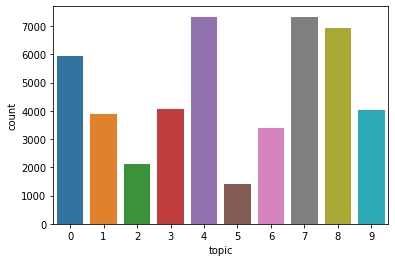

In [187]:
sns.countplot(df['topic'])

In [163]:
# time the process
tic = time.perf_counter()

texts = df["text_lemma_clean"].tolist()

df_topic_sents_keywords = format_topics_sentences(ldamodel, doc_term_matrix, texts)

Sentiment_list=[]
blob=TextBlob(str(texts))

# get sentiments for sentences
for sentence in blob.sentences:
    Sentiment_list.append(analyzer.polarity_scores(str(sentence)))
    #Sentiment_list.append(sentence.sentiment.polarity)

sentiment = pd.DataFrame.from_dict(Sentiment_list)
sentiment = sentiment['compound'].astype(float)

# create df
df_topic_sents_keywords = pd.concat([df_topic_sents_keywords,sentiment],axis=1)

# time the process
toc = time.perf_counter()
print("The process took {} seconds".format(toc - tic))

KeyboardInterrupt: 

In [165]:
# save_to_pickle(df_topic_sents_keywords, "df_topic_sents_keywords.pkl")
# save_to_pickle(df_dominant_topic, "df_dominant_topic.pkl")

df_topic_sents_keywords = open_pickle("df_topic_sents_keywords.pkl")
df_dominant_topic = open_pickle("df_dominant_topic.pkl")

In [191]:
# Format topics df
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Percent_Contrib', 'Keywords','Text','Sentiment']

# Show dominant topics (sample) 
df_dominant_topic[['Document_No', 'Dominant_Topic', 'Topic_Percent_Contrib', 'Keywords','Sentiment']].head(10)

Document_No  Dominant_Topic  Topic_Percent_Contrib  \
0  0            9.0             0.4997                  
1  1            8.0             0.9316                  
2  2            2.0             0.6042                  
3  3            8.0             0.8021                  
4  4            5.0             0.8951                  
5  5            9.0             0.9339                  
6  6            8.0             0.4213                  
7  7            9.0             0.9022                  
8  8            6.0             0.4742                  
9  9            8.0             0.8732                  

                                                                                Keywords  \
0  said, health, illinois, coronavirus, covid19, state, people, case, chicago, public      
1  chicago, said, one, year, city, people, police, time, like, would                       
2  school, student, state, illinois, said, university, press, 2020, district, associated   
3  chicago, said, one, year, city, people, police, time, like, would                       
4  state, illinois, said, tax, new, marijuana, cannabis, year, business, would             
5  said, health, illinois, coronavirus, covid19, state, people, case, chicago, public      
6  chicago, said, one, year, city, people, police, time, like, would                       
7  said, health, illinois, coronavirus, covid19, state, people, case, chicago, public      
8  chicago, service, business, community, program, company, work, illinois, new, also      
9  chicago, said, one, year, city, people, police, time, like, would                       

   Sentiment  
0  0.0000     
1  0.0000     
2  0.1779     
3  0.7783     
4  0.6812     
5  0.7003     
6  0.0000     
7  0.7506     
8  0.0000     
9  0.5423

In [166]:
# save_to_pickle(Sentiment, "Sentiment.pkl")
sentiment = open_pickle("Sentiment.pkl")

In [167]:
# get most representative sentences
%time sent_mean, sent_topics_sorteddf_mallet = get_most_representative_sent_per_topic(df_topic_sents_keywords)

Wall time: 85.8 ms


In [168]:
# save_to_pickle(sent_mean, "sent_mean.pkl")
# save_to_pickle(sent_topics_sorteddf_mallet, "sent_topics_sorteddf_mallet.pkl")

sent_mean = open_pickle("sent_mean.pkl")
sent_topics_sorteddf_mallet = open_pickle("sent_topics_sorteddf_mallet.pkl")

In [169]:
# Show 20 top sentences
sent_topics_sorteddf_mallet.head(20)

Topic_Num  Topic_Percent_Contrib  \
0  0.0        0.9993                  
1  1.0        0.9999                  
2  2.0        0.9975                  
3  3.0        0.9998                  
4  4.0        0.9988                  
5  5.0        0.9990                  
6  6.0        0.9993                  
7  7.0        0.9994                  
8  8.0        0.9999                  
9  9.0        0.9994                  

                                                                                Keywords  \
0  court, illinois, law, energy, state, attorney, act, bank, county, power                 
1  illinois, church, u, district, candidate, president, said, republican, cbd, democrat    
2  school, student, state, illinois, said, university, press, 2020, district, associated   
3  chicago, home, park, restaurant, new, food, event, art, community, pm                   
4  share, company, stock, quarter, rating, price, average, research, inc, ratio            
5  state, illinois, said, tax, new, marijuana, cannabis, year, business, would             
6  chicago, service, business, community, program, company, work, illinois, new, also      
7  said, state, trump, illinois, election, chicago, president, former, primary, voter      
8  chicago, said, one, year, city, people, police, time, like, would                       
9  said, health, illinois, coronavirus, covid19, state, people, case, chicago, public      

   Avg Sentiment  
0  0.6705         
1  0.0000         
2 -0.1027         
3 -0.3167         
4  0.6712         
5  0.4939         
6  0.0000         
7  0.2263         
8  0.6808         
9  0.0000

In [171]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = sent_topics_sorteddf_mallet[['Topic_Num', 'Keywords','Avg Sentiment']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts.sort_index(), topic_contribution.sort_index()], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords','Avg Sentiment', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics.sort_values(by= "Perc_Documents", ascending = False)

Dominant_Topic  \
9.0  9.0              
8.0  8.0              
6.0  6.0              
5.0  5.0              
3.0  3.0              
7.0  7.0              
2.0  2.0              
1.0  1.0              
4.0  4.0              
0.0  0.0              

                                                                            Topic_Keywords  \
9.0  said, health, illinois, coronavirus, covid19, state, people, case, chicago, public      
8.0  chicago, said, one, year, city, people, police, time, like, would                       
6.0  chicago, service, business, community, program, company, work, illinois, new, also      
5.0  state, illinois, said, tax, new, marijuana, cannabis, year, business, would             
3.0  chicago, home, park, restaurant, new, food, event, art, community, pm                   
7.0  said, state, trump, illinois, election, chicago, president, former, primary, voter      
2.0  school, student, state, illinois, said, university, press, 2020, district, associated   
1.0  illinois, church, u, district, candidate, president, said, republican, cbd, democrat    
4.0  share, company, stock, quarter, rating, price, average, research, inc, ratio            
0.0  court, illinois, law, energy, state, attorney, act, bank, county, power                 

     Avg Sentiment  Num_Documents  Perc_Documents  
9.0  0.0000         7270           0.2441          
8.0  0.6808         5757           0.1933          
6.0  0.0000         4024           0.1351          
5.0  0.4939         3601           0.1209          
3.0 -0.3167         2986           0.1003          
7.0  0.2263         2014           0.0676          
2.0 -0.1027         1783           0.0599          
1.0  0.0000         830            0.0279          
4.0  0.6712         791            0.0266          
0.0  0.6705         729            0.0245

#### Interpreation of LDA Topic Modeling

Most relevant major topics seem to be about coronavirus, police, chicago buiness, marijuana, arts, politics, schools

### K-means clustering Topic Modeling

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.metrics import pairwise_distances

# time the process
tic = time.perf_counter()

# create tf-idf array
tf_idf_vectorizor = TfidfVectorizer(stop_words = 'english', max_features =5000,max_df=0.7,min_df=50,use_idf=True)
tf_idf = tf_idf_vectorizor.fit_transform(df['text_clean'])
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()

# time the process
toc = time.perf_counter()
print("The process took {} seconds".format(toc - tic))

# get df shape
pd.DataFrame(tf_idf.toarray(), columns=tf_idf_vectorizor.get_feature_names()).shape

The process took 14.500998100000004 seconds


(46444, 5000)

In [37]:
# fit kmeans model
clusters = 20
km_model = KMeans(n_clusters=clusters)
km_model.fit(tf_idf_array)
order_centroids = km_model.cluster_centers_.argsort()[:, ::-1]

terms = tf_idf_vectorizor.get_feature_names()

In [135]:
print("Top terms per cluster:")

# print clusters
for i in range(clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :8]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))

# save kmeans cluster labels into df
df['cluster'] = km_model.labels_

Top terms per cluster:
Cluster 0: bulls nba game jordan allstar basketball season team
Cluster 1: illinois state said tax states federal people senate
Cluster 2: biden election sanders primary voters democratic voting illinois
Cluster 3: game season bears team games cubs points teams
Cluster 4: pritzker said illinois order state covid19 coronavirus governor
Cluster 5: marijuana cannabis recreational sales dispensaries illinois legal state
Cluster 6: students school schools university said education student teachers
Cluster 7: police said officers man shooting shot officer block
Cluster 8: city said new like park time 2020 people
Cluster 9: restaurant food restaurants chef delivery menu pizza bar
Cluster 10: lightfoot mayor city said lori order people coronavirus
Cluster 11: oasdi beneficiaries disability program write security administration story
Cluster 12: shares stock quarter rating company 00 ratio price
Cluster 13: property listing indexpost singlefamily broker residence bedrooms

In [136]:
# subjective interpretation of cluster labels
cluster_labels_subj = [
    "sports/basketball", #0
    "taxes", #1
    "politics/elections", #2
    "sports/football and baseball", #3
    "law/coronavirus", #4
    "marijuana/legalization", #5
    "education", #6
    "shootings", #7
    "parks", #8
    "restaurants and food", #9
    "law/coronavirus", #10
    "social welfare", #11
    "business/financial", #12
    "property listings", #13
    "public health/coronavirus", #14
    "police", #15
    "government corruption", #16
    "coronavirus deaths", #17
    "unknown", #18
    "business opportunities" #19    
]

In [140]:
#labeled clusters
labeled_clusters = pd.DataFrame(list(enumerate(cluster_labels_subj)))
labeled_clusters.columns = ["cluster", "cluster_description"]

In [148]:
# left join labeled clusters to dataframe
df = pd.merge(df, labeled_clusters, how='left', on=['cluster', 'cluster'])

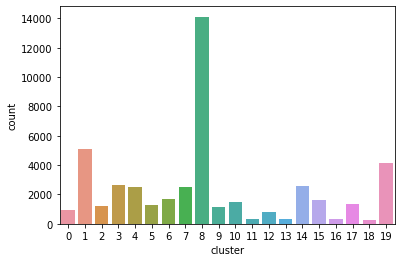

In [39]:
sns.countplot(df['cluster'])

In [106]:
# save_to_pickle(tf_idf_array, "tf_idf_array.pkl")
# save_to_pickle(df, "df_2.pkl")
# save_to_pickle(km_model, "km_model.pkl")

#### Interpretation of kmeans topic modeling
kmeans topics shows that major topics are politics, covid, police, shootings, marijuana, business, sports, schools

It worth noting that the jussie smollett story was also a major topic. Based on our domain knowledge of Chicago and this story, this is another topic about police and race relations

## Named Entity Recognition

##### General NER

In [208]:
# This approach takes WAY too long
# %time clean_text_list = list(itertools.chain.from_iterable(df['text_clean'].apply(word_tokenize)))

# entities = []
# labels = []

# count_ = 0
# for chunk in nltk.ne_chunk(nltk.pos_tag(clean_text_list), binary = False):
#     if hasattr(chunk, 'label'):
#         entities.append(' '.join(c[0] for c in chunk)) #Add space as between multi-token entities
#         labels.append(chunk.label())
#     count_ += 1
#     if count_ % 50 == 0:
#         print(f"{count_} iterations complete")

# #entities_labels = list(zip(entities, labels))
# entities_labels = list(set(zip(entities, labels))) #unique entities

KeyboardInterrupt: 

In [42]:
import spacy
nlp = spacy.load('en_core_web_sm')

entities = []
labels = []


doc=nlp(str(df['text_clean']))

for ent in doc.ents:
    entities.append(ent)
    labels.append(ent.label_)

entities_labels = list(set(zip(entities, labels)))
entities_df = pd.DataFrame(entities_labels)
entities_df.columns = ["Entities", "Labels"]

In [43]:
organizations = entities_df.loc[entities_df["Labels"] == 'ORG']
people = entities_df.loc[entities_df["Labels"] == 'PERSON']

In [44]:
print(f"Found {len(people)} people")

Found 54 people


In [45]:
print(f"Found {len(organizations)} organizations")

Found 61 organizations


##### Targeted Entity Sentiment Analysis

In [46]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [47]:
blob = TextBlob(str(df['text_clean']))

In [90]:
org_list = organizations['Entities'].astype(str).values.flatten().tolist()
person_list = people['Entities'].astype(str).values.flatten().tolist()

In [91]:
# initialize lists

# person lists
person=[]
person_sentences=[]
p_polarity = []
p_subjectivity = []
p_sentiment = []

# org lists
org=[]
org_sentences=[]
o_polarity = []
o_subjectivity = []
o_sentiment = []

# time the process
tic = time.perf_counter()

# iterate through sentences

count_ = 0

for sentence in blob.sentences:
    for word in person_list:
        if word in sentence:
            person.append(word)
            person_sentences.append(sentence.raw)
            p_polarity.append(sentence.sentiment.polarity)
            p_subjectivity.append(sentence.sentiment.subjectivity)
            p_sentiment.append(analyser.polarity_scores(str(sentence)))
            
    for word in org_list:
        if word in sentence:  
            org.append(word)
            org_sentences.append(sentence.raw)
            o_polarity.append(sentence.sentiment.polarity)
            o_subjectivity.append(sentence.sentiment.subjectivity)
            o_sentiment.append(analyser.polarity_scores(str(sentence)))
    
    count_+=1
    if count_ % 50 == 0:
        print(f"{count_} sentences done")

# time the process
toc = time.perf_counter()
print("The process took {} seconds".format(toc - tic))

50 sentences done
100 sentences done
The process took 0.1730285000001004 seconds


In [92]:
# create person entity dataframe
df_person = pd.DataFrame()
df_person['sentence'] = person_sentences
df_person['person'] = person
df_person['polarity'] = p_polarity
df_person['subjectivity'] = p_subjectivity
df_person['sentence'] = df_person['sentence'].str.replace('\n', ' ')
df_person['polarity_label'] = 'Neutral'
df_person.loc[df_person['polarity'] > 0.1, 'polarity_label'] = 'Positive'
df_person.loc[df_person['polarity'] < -0.1, 'polarity_label'] = 'Negative'
pdf= pd.DataFrame.from_dict(p_sentiment)
df_person['Sentiment'] = pdf['compound'].astype(float)
df_person['sentiment_label'] = 'Neutral'
df_person.loc[df_person['Sentiment'].astype(float) >=0.4, 'sentiment_label'] = 'Positive'
df_person.loc[df_person['Sentiment'].astype(float) <= -0.4, 'sentiment_label'] = 'Negative'

In [93]:
# look at samples
df_person.loc[df_person['polarity_label'] == 'Positive',['person','sentence','polarity_label']].sample(10) 

person  \
63   Pritzker            
65   Pritzker            
32   Mary                
124  Schmidt Rodriguez   
113  Hilco               
48   Pritzkers           
37   Mary                
53   Amy Eshleman        
35   Pritzkers           
17   Pritzker            

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     sentence  \
63   The First Lady has a taxpayerfunded staffer and two taxpayerfunded offices  so her whereabouts are not off limits, Carlson added.Pritzker refused to answer questions about his hypocrisy.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
65   The First Lady has a taxpayerfunded staffer and two taxpayerfunded offices  so her whereabouts are not off limits, Carlson added.Pritzker refused to answer questions about his hypocrisy.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
32   So when they appear to violate there own rules, when they play these rules for thee, but not for me games, it doesnt go down well with the public.Patch.com reported that Pritzkers wife Mary had flown out of the state despite a stayathome order and a request against nonessential travel to go their 12 million equestrian estate in Wellington, Florida.So a reporter asked Pritzker about his wifes disappearance during a press conference.Wheres the First Lady Is she accompanied by a state security detail Has she engaged in nonessential travel What is your response to people who say the stayathome order and nonessential travel bans arent abided by your family a reporter asked.Pritzker then, with a huge amount of gall, chastised the reporter for daring to ask the question and even writing about it.Well, first of all, I want to say is that in politics it used to be that we kept our families out of it.   
124  He remained hospitalized Sunday but was no longer in critical condition.

In [103]:
df_person.groupby(by='person').mean()

polarity  \
person                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
Amy Eshleman                                                                                                                                                                                                                                                                                  

In [94]:
# create organization entity dataframe
df_org = pd.DataFrame()
df_org['Org'] = org
df_org['sentence'] = org_sentences
df_org['polarity'] = o_polarity
df_org['subjectivity'] = o_subjectivity
df_org['sentence'] = df_org['sentence'].str.replace('\n', ' ')
df_org['polarity_label'] = 'Neutral'
df_org.loc[df_org['polarity'] > 0.1, 'polarity_label'] = 'Positive'
df_org.loc[df_org['polarity'] < -0.1, 'polarity_label'] = 'Negative'
odf=pd.DataFrame.from_dict(o_sentiment)
df_org['Sentiment'] = odf['compound'].astype(float)
df_org['sentiment_label'] = 'Neutral'
df_org.loc[df_org['Sentiment'] > 0.4, 'sentiment_label'] = 'Positive'
df_org.loc[df_org['Sentiment'] < -0.4, 'sentiment_label'] = 'Negative'

In [95]:
# look at samples
df_org.loc[df_org['sentiment_label'] == 'Positive',['Org','sentence','sentiment_label']].sample(10) 

Org  \
4    Pritzkers      
112  Paczki         
39   Mount Sinai    
113  Paczki         
0    Pritzkers      
5    Pritzkers      
57   Neoclassical   
49   AP             
115  Paczki         
3    Patch.com      

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     sentence  \
4    So when they appear to violate there own rules, when they play these rules for thee, but not for me games, it doesnt go down well with the public.Patch.com reported that Pritzkers wife Mary had flown out of the state despite a stayathome order and a request against nonessential travel to go their 12 million equestrian estate in Wellington, Florida.So a reporter asked Pritzker about his wifes disappearance during a press conference.Wheres the First Lady Is she accompanied by a state security detail Has she engaged in nonessential travel What is your response to people who say the stayathome order and nonessential travel bans arent abided by your family a reporter asked.Pritzker then, with a huge amount of gall, chastised the reporter for daring to ask the question and even writing about it.Well, first of all, I want to say is that in politics it used to be that we kept our families out of it.   
112  Paczki are totally different, as they are filled with sweetness and stuffed with fruit chunks.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
39   Police say the man was taken to Mount Sinai, where he was listed in good condition.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
113  The Polish community celebrates Paczki Day on the Thursday before Lent, or Tusty Czwartek.                                   

In [96]:
df_org.groupby(by='Org').mean()

polarity  subjectivity  \
Org                                                                     
09:36A                                        -0.233333  0.233333       
AP                                             0.018961  0.454657       
APCHICAGO AP                                  -0.161667  0.528333       
Advocate Christ Medical Center                -0.058333  0.050000       
Auman                                          0.020983  0.344858       
Breitbart News                                 0.062500  0.383333       
Capitol                                        0.062500  0.383333       
Carlson                                        0.156250  0.358333       
Casa del Sueno                                -0.024472  0.323990       
Christ Hospital                                0.000000  0.800000       
Daily Chronicle                                0.333333  0.333333       
Emergency Medical Services Regions             0.000000  0.212037       
FBI                                            0.033333  0.391667       
Getty ImagesChicago                           -0.011111  0.194444       
Guglielmi                                      0.044167  0.639167       
Hilco Redevelopment Partners                  -0.044234  0.456566       
Holy Cross Hospital                           -0.200000  0.300000       
Hormels Rochelle Foods                        -0.233333  0.233333       
Illinois Rising Action                         0.062500  0.383333       
Illinois Valley Times                          0.000000  0.000000       
Independent Together                           0.292857  0.639286       
Lasalle Weekly Newsletter Signup               0.346429  0.683929       
Lightfoot                                      0.035833  0.515208       
Mount Sinai                                    0.301667  0.580000       
Neoclassical                                   0.850000  1.000000       
Northwestern University Hospital               0.000000  0.000000       
Nutella                                       -0.083333  0.216667       
OCHD                                          -0.106175  0.289096       
Oak Mill                                       0.090476  0.381548       
Oak Mill Bakery                               -0.083333  0.216667       
Ogle County Health Department OCHD            -0.233333  0.233333       
Paczki                                         0.066071  0.461607       
Patch.com                                      0.268889  0.571111       
People Attended House Party                   -0.011111  0.194444       
Pritzkers                                      0.049161  0.474129       
Rochelle Foods                                -0.029137  0.168972       
Stroger Hospital                              -0.075000  0.050000       
The Associated Press                          -0.161667  0.528333       
The Chicago Department of Public Health        0.116000  0.333167       
The Civilian Office of Police Accountability   0.033333  0.391667       
The Illinois Department of Public Health IDPH  0.000000  0.212037       
The Illinois Governors Mansion                -0.024472  0.323990       
Tyler Durden Sun                              -0.233333  0.233333       
the Arts for Illinois Relief Fund              0.185000  0.465000       
the Chicago Sanity and Ship Canal             -0.044234  0.456566       
the Chicago Sun Times                          0.185000  0.465000       
the Chicago Tribune                           -0.161667  0.528333       
the James R. Thompson Center                   0.062500  0.383333       
the University of Chicago Hospital             0.350000  0.300000       
the University of Chicago Medical Center       0.027024  0.352857       

                                               Sentiment  
Org                                                       
09:36A                                        -0.458800   
AP                                             0.156525   
APCHICAGO AP  

# Sentiment Classification

In [54]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb
from xgboost import XGBClassifier as xg
from sklearn import feature_extraction, linear_model, model_selection
from sklearn.feature_extraction import DictVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import datasets,ensemble
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier as xg
from xgboost import plot_importance

C:\Users\pnbutler\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\pnbutler\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\pnbutler\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be r

In [55]:
import decimal

def float_range(start, stop, step, round_to = 1):
    """
    Simple function to return a series of floats
    Get around shortcomings of range() iterators and np.arange()
    
    This function will print every number from start to stop including stop
    
    Output
    -----------
    A generator object. Use list() to create a usable list
    
    Dependencies
    -----------
    decimal
    """
    while round(start, round_to) <= stop:
        yield round(float(start), round_to)
        start += float(decimal.Decimal(step))

In [56]:
class tree_classification_model_evaluation:
    """
    Get all binary classification reports from a fitted tree-based model
    
    Author: Patrick Butler

    Attributes:
        - fitted_model
        - X_train
        - X_test
        - y_train : must be encoded as 0, 1, etc
        - y_test : must be encoded as 0, 1, etc

    Methods:
        - predicts_and_probas()
        -

    Dependencies:
        - sklearn
        - pandas
        - numpy

    Note:
        Import statements should contain this:
        # import packages
        import pandas as pd
        import numpy as np
        import matplotlib.pyplot as plt
        from scipy import stats
        from sklearn import metrics
        from sklearn.metrics import confusion_matrix
        from sklearn.metrics import plot_confusion_matrix
        from sklearn.metrics import classification_report
        from sklearn.metrics import roc_auc_score
        from sklearn.metrics import roc_curve
        from sklearn import tree
    """

    def __init__(self, fitted_model, X_train, X_test, y_train, y_test):
        self.fitted_model = fitted_model
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test

    def predicts_and_probas(self, dataset = "test", type_ = "both"):
        """
        DATASET:
        dataset == 'train' : return preds and probas using X_train
        dataset == 'test' : return preds and probas using X_test

        TYPE_:
        type_ == both : return predictions and prediction probabilities as preds, proba
        type_ == preds : return preds only
        type_ == proba : return prediction probabilities only
        """
        if dataset == 'test':
            X = self.X_test
        elif dataset == 'train':
            X = self.X_train
        else:
            raise Exception("dataset only takes values 'train' and 'test'." )

        preds = self.fitted_model.predict(X)
        try:
            proba = self.fitted_model.predict_proba(X)
        except:
            proba = None
            print("Cannot return prediction probabilities with model params")

        if type_ == "both":
            return preds, proba
        elif type_ == "preds":
            return preds
        elif type_ == "proba":
            return proba
        else:
            raise Exception("invalid predict 'type':\n\nUse 'both', 'preds', or 'proba' for the 'type' parameter")

    def print_clf_reports(self, dataset="test"):
        """
        simple method for printing the confusion matrix and classification report

        ...

        Parameters
        ----------
        dataset == 'test' : print clf reports for test data
        dataset == 'train' : print clf reports for train data

        Objects used
        ----------
        clf_model : model
            a trained classification model capable of making predictions
        X : matrix
            data used by clf_model to make predictions
        y : vector
            actual values of predictions (the target variable)
        y_pred : vector
            predicted values by the model to be compared to actual values

        Dependencies
        ----------
        - sklearn
        - numpy
        - matplotlib
        """
        if dataset == 'test':
            X = self.X_test
            y = self.y_test
            y_pred = self.predicts_and_probas(dataset="test", type_="preds")
        elif dataset == 'train':
            X = self.X_train
            y = self.y_train
            y_pred = self.predicts_and_probas(dataset="train", type_="preds")
        else:
            raise Exception("dataset only takes values 'train' and 'test'.")

        np.set_printoptions(precision=1)

        # class_names = list(set(y))

        # Plot non-normalized confusion matrix
        titles_options = [("Confusion matrix, without normalization", None),
                          ("Normalized confusion matrix", 'true')]

        for title, normalize in titles_options:
            disp = plot_confusion_matrix(self.fitted_model, X, y,
                                         # display_labels=class_names,
                                         cmap=plt.cm.Blues,
                                         normalize=normalize, values_format='.1f')
            disp.ax_.set_title(title)

            # print(title)
            # print(disp.confusion_matrix)

        # print the confusion matrix
        # print("Confusion Matrix\n{}".format(confusion_matrix(y_true= y_test, y_pred= y_test_pred)))

        # print the classification report
        print("\nClassification Report\n{}".format(classification_report(y_true=y, y_pred=y_pred)))

        plt.show()

    # build function to print feature importance
    def plot_feature_importance_(self, top_n_features="all", figsize=(8, 6)):
        """
        Plots the feature importances for a classifier model
        ...
        Input:
        - Model
        - dataset (X)
        - figsize
        - top_n_elements <- total number of features for plot and list

        Output:
        -Chart of feature importances

        Dependencies
        ------------
        - sklearn
        - numpy
        - matplotlib
        """
        # if dataset == 'test':
        #     X = self.X_test
        # elif dataset == 'train':
        #     X = self.X_train
        # else:
        #     raise Exception("dataset only takes values 'train' and 'test'.")
        
        X = self.X_train
        
        if top_n_features == "all":
            top_n_features = X.shape[1]

        # Calculate feature importances
        importances = self.fitted_model.feature_importances_

        # Sort feature importances in descending order
        indices = np.argsort(importances)[::-1]
        
        # Rearrange feature names so they match the sorted feature importances
        names = [X.columns[i] for i in indices]

        # Print the feature ranking
        print("Top {} Feature ranking:".format(top_n_features))

        for f in range(top_n_features):
            print("%d. feature %d : %s (%f)" % (f + 1, indices[f], X.columns[indices[f]], importances[indices[f]]))

        # Calculate the std for feature importances
        try:
            if type(self.fitted_model.estimators_) == np.ndarray:  # for case where .ndim == 2
                estimators = list(self.fitted_model.estimators_.flatten())
            else:
                estimators = self.fitted_model.estimators_
            std = np.std([tree.feature_importances_ for tree in estimators], axis=0)
            std = std[indices][:top_n_features]
        except:
            std = None

        # Create plot
        plt.figure(figsize=figsize)

        # Create plot title
        plt.title("Feature Importance of Top {} Features".format(top_n_features))

        # Add bars
        plt.bar(range(top_n_features), importances[indices][:top_n_features], yerr=std, # try/except with yerr <- some may not work with this
                align="center")

        # Add feature names as x-axis labels
        plt.xticks(range(top_n_features), names, rotation=90)

        # Show plot
        plt.show()

    # build function to plot ROC curves
    def plot_roc_curve(self, dataset="test", pred_class=1, label="Model", lw=2, marker=None, title="ROC Curve"):
        """
        simple method for plotting an ROC curve for a given model
        ...

        Parameters
        ----------
        y :
            y values
        probs :
            probabilities from sklearn.predict_proba()
        kwargs:
            - dataset - train or test
            - pred_class - which class to use for ROC metrics
            - label - label in legend
            - lw - line weight
            - marker - marker shape in plot

        Dependencies
        ----------
        - sklearn
        - matplotlib

        References
        ----------
        sklearn documentation
        """
        if dataset == 'test':
            y = self.y_test
            probs = self.predicts_and_probas(dataset="test", type_="proba")
            probs = probs[:, pred_class]
        elif dataset == 'train':
            y = self.y_train
            probs = self.predicts_and_probas(dataset="train", type_="proba")
            probs = probs[:, pred_class]
        else:
            raise Exception("dataset only takes values 'train' and 'test'.")



        # calculate roc curve
        fpr, tpr, thresholds = roc_curve(y, probs)

        # calculate AUC
        auc = roc_auc_score(y, probs)
        print("ROC AUC Score: {}".format(auc))

        # calculate roc curves
        lr_fpr, lr_tpr, _ = roc_curve(y, probs)

        # plot the roc curve for the model
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.plot(fpr, tpr, marker=marker, lw=lw, label=label)

        # axis labels
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')

        # show the legend
        plt.legend()

        # set the title
        plt.title(title, fontsize=17)

        # show the plot
        plt.show()

    def print_tree_diagram(self, tree_number=-1, figsize=(10, 4)):

        """
        simple method to print a tree diagram (alternative to export graphviz)

        Dependencies
        ------------
        sklearn
        matplotlib
        """

        # Extract single tree
        estimator = self.fitted_model.estimators_[tree_number]

        # Set names
        feature_names = self.X_test.columns
        class_names = [str(i) for i in list(set(self.y_test))]

        # Intantiate plot figure
        fig, axes = plt.subplots(nrows=1, ncols=1, figsize=figsize, dpi=800)

        # Plot tree
        tree.plot_tree(estimator,
                       feature_names=feature_names,
                       class_names=class_names,
                       filled=True)

        fig.savefig('rf_individualtree.png')

        plt.show()

    def get_depths(self):
        """
        prints the max and average depth of the trees within the random forest

        Dependencies
        -----------
        NumPy
        """
        if type(self.fitted_model.estimators_) == np.ndarray: #for case where .ndim == 2
            estimators = list(self.fitted_model.estimators_.flatten())
        else:
            estimators = self.fitted_model.estimators_
        
        print("Max Depth: {}\nAverage Depth: {}".format(max([estimator.get_depth() for estimator in estimators]),
                                                        np.mean(
                                                            [estimator.get_depth() for estimator in estimators])))

In [57]:
# read in training data
tuning_filename = "hand_coded_sentiments.csv"
train = pd.read_csv(tuning_filename)

In [58]:
# drop any nas
train = train.dropna()

# account for typos
train = train.loc[train.Sentiment.isin(["-1","0","1"])]

# convert to appropriate data types
train["Text"] = train["Text"].astype(str)
train['Sentiment'] = train['Sentiment']

In [59]:
train.shape

(1398, 2)

In [60]:
%time train["Text"] = train['Text'].apply(lambda x: clean(x))

Wall time: 859 ms


In [61]:
tfidf_vectorizer = feature_extraction.text.TfidfVectorizer()

# set x, y values for training
X = tfidf_vectorizer.fit_transform(train["Text"])
y = np.ravel(train['Sentiment'])

In [62]:
X.shape

(1398, 28031)

In [63]:
from collections import Counter
# summarize class distribution
counter = Counter(y)
pprint(counter)

Counter({'0': 879, '-1': 305, '1': 214})


In [66]:
# account for imbalanced dataset
SEED = 6122020
X, y = SMOTE(sampling_strategy='minority', random_state = SEED , n_jobs = -1).fit_resample(X, y)

C:\Users\pnbutler\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [67]:
# Problem 2 = Generate X_train, X_test, y_train & y_test. Use 95% for train & 5% for test.
SEED = 6122020

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=.05, # 70/30 split
                                                    shuffle = True, # shuffle the data to make the split more random
                                                    stratify = y, # stratify the target variable to balance representation in the split
                                                    random_state=SEED)

In [73]:
# instantiate model
xg_clf = xgb.XGBClassifier(random_state = SEED)

# Create param ranges:
xg_n_estimators_range = [int(i) for i in list(float_range(100, 1000, 50, round_to = 0))]
xg_learning_rate_range = list(float_range(0.1, 1.6, 0.1, round_to = 1))
xg_gamma_range = list(float_range(0.0, 5.0, 0.25, round_to = 2))


#Use the AdaBoostClassifier along with the GridSearchCV tool
xg_param_grid = {'n_estimators': xg_n_estimators_range,
                 'learning_rate': xg_learning_rate_range,
                 'max_depth': [1, 2],
                 'gamma' : xg_gamma_range,
                 'random_state':[SEED]}

In [78]:
# Create gridsearch object with various combinations of parameters
xg_RandomSearch = RandomizedSearchCV(xg_clf,
                                     xg_param_grid,
                                     cv = 5, # 5-fold CV
                                     #scoring = 'roc_auc', # ROC AUC Score to identify best model params
                                     refit = True,
                                     n_jobs = -1,
                                     verbose = 5)

In [79]:
%time xg_RandomSearch.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  50 | elapsed:  3.7min remaining:  2.4min
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed:  4.6min remaining:  1.0min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  5.5min finished


Wall time: 6min 4s


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                   param_distributions={'gamma': [0.0, 0.25, 0.5, 0.75, 1.0,
                                                  1.25, 1.5, 1.75, 2.0, 2.25,
                          

In [80]:
xg_RandomSearch.best_estimator_

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.25, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=1.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=6122020, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [81]:
# print the best performing model 
model = xg_RandomSearch.best_estimator_

In [82]:
# Instatiate the custom model eval class for tree classifiers 
xg = tree_classification_model_evaluation(xg_RandomSearch.best_estimator_, X_train, X_test, y_train, y_test)


Classification Report
              precision    recall  f1-score   support

          -1       0.55      0.38      0.44        16
           0       0.76      0.73      0.74        44
           1       0.80      0.93      0.86        44

    accuracy                           0.76       104
   macro avg       0.70      0.68      0.68       104
weighted avg       0.75      0.76      0.75       104



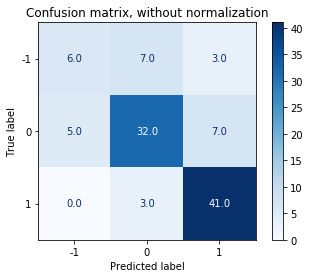

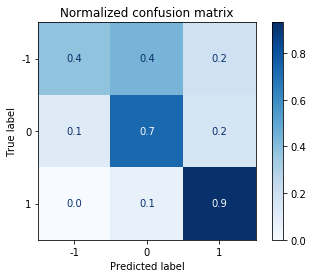

In [83]:
# C = Print confusion matrix and classication report for test data
xg.print_clf_reports()

In [85]:
# make predictions on dataset
text_for_sentiment = tfidf_vectorizer.transform(df["text_clean"])
preds = model.predict(text_for_sentiment)

In [86]:
df['tuned_sentiment'] = list(preds)

0     17680
1     16275
-1    12489
Name: tuned_sentiment, dtype: int64

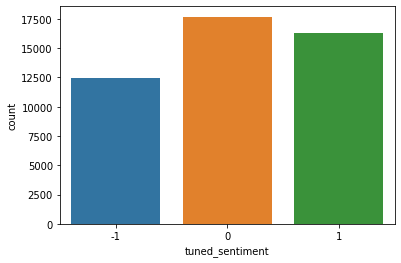

In [87]:
sns.countplot(df['tuned_sentiment'])
df.tuned_sentiment.value_counts()

In [88]:
pd.crosstab(df['cluster'], df['tuned_sentiment']).apply(lambda r: r/r.sum()*100, axis=1)

tuned_sentiment         -1          0          1
cluster                                         
0                4.933196   33.299075  61.767729
1                27.825577  44.133750  28.040673
2                19.127517  49.580537  31.291946
3                5.634861   32.794891  61.570248
4                34.228457  31.422846  34.348697
5                22.595778  35.340109  42.064113
6                15.611814  42.254370  42.133816
7                96.630566  1.042920   2.326514 
8                17.779982  43.543246  38.676773
9                7.643885   26.079137  66.276978
10               52.274270  30.210455  17.515275
11               0.280899   54.775281  44.943820
12               0.000000   84.468339  15.531661
13               4.863222   94.832827  0.303951 
14               35.102673  30.337079  34.560248
15               77.399757  10.571081  12.029162
16               64.689266  16.949153  18.361582
17               47.671033  31.659389  20.669578
18               55.600000  22.000000  22.400000
19               5.882353   49.879460  44.238187

In [152]:
pd.crosstab(df['topic'], df['tuned_sentiment']).apply(lambda r: r/r.sum()*100, axis=1)

tuned_sentiment         -1          0          1
topic                                           
0                17.242542  38.968481  43.788977
1                22.279526  55.853533  21.866942
2                25.071225  54.368471  20.560304
3                15.480864  48.307164  36.211973
4                50.777838  16.512009  32.710153
5                8.132956   77.298444  14.568600
6                18.232531  52.906635  28.860834
7                21.115810  31.278134  47.606056
8                41.375829  26.290741  32.333429
9                14.091134  46.235760  39.673105

# Data Visualization

In [124]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def create_word_cloud(series, title = "Wordcloud", suppressed_words = None, figsize = (15,15)):
    """
    simple function to create a word cloud from a pandas series
    """
    # Join the different processed titles together.
    long_string = ','.join(list(series.values))
    
    # remove suppressed words
    if suppressed_words is not None:
        long_string = ' '.join(filter(lambda x: x.lower() not in suppressed_words,  long_string.split()))
    
    # Create a WordCloud object
    wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
    # Generate a word cloud
    wordcloud = wordcloud.generate(long_string)
    # Visualize the word cloud
    plt.figure(figsize=figsize)
    plt.title(title, size = 18)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

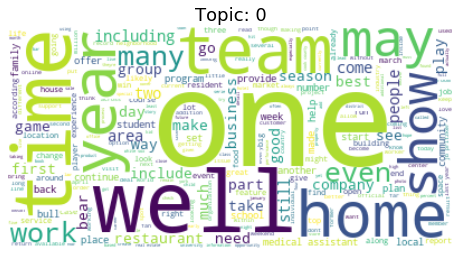

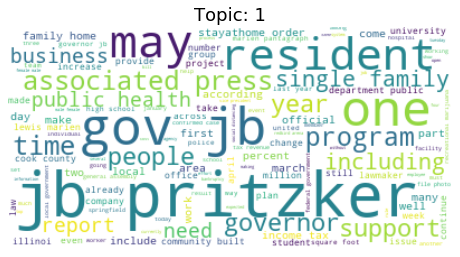

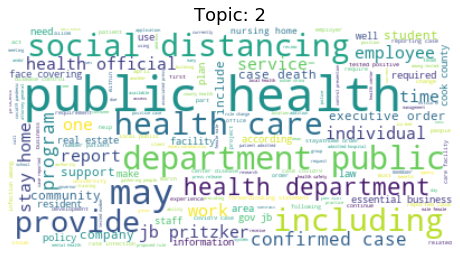

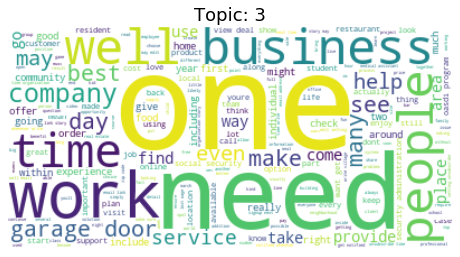

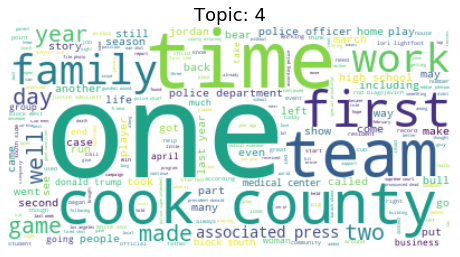

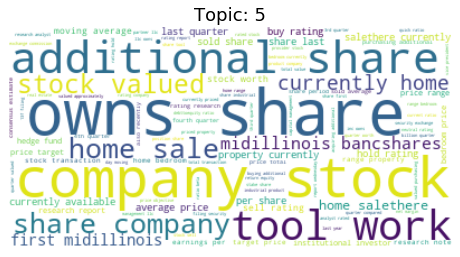

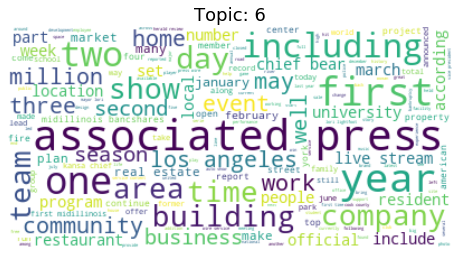

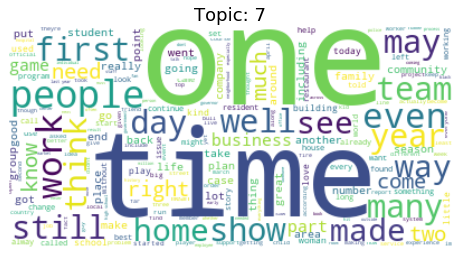

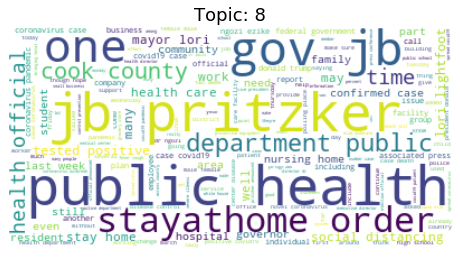

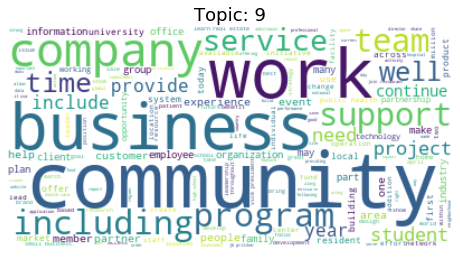

In [130]:
# Create a word cloud for each topic with the article text

suppressed_words = ["chicago", "illinois", "news", "new", "state", "city", "said", "say"]

for i in range(len(df.topic.unique())):
    create_word_cloud(series = df.loc[df.topic == str(i),"text_lemma_clean"], title = f"Topic: {i}", suppressed_words = suppressed_words, figsize = (8,8))
    print("\n\n")

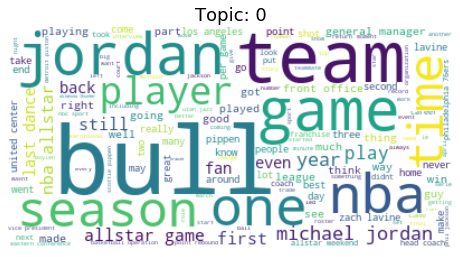

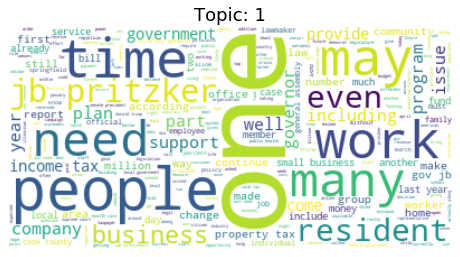

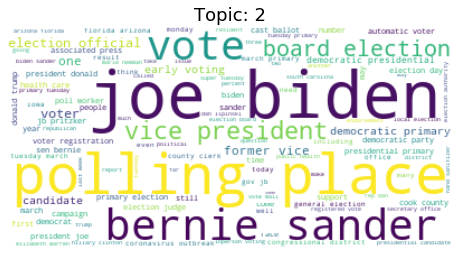

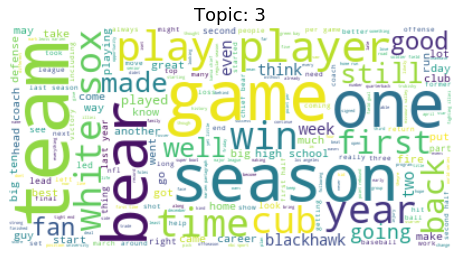

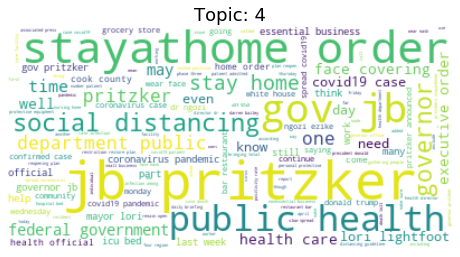

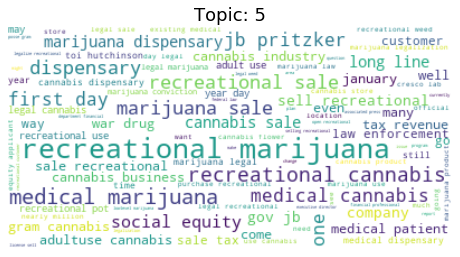

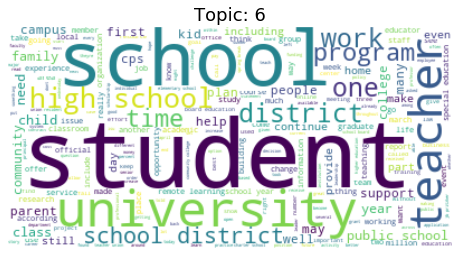

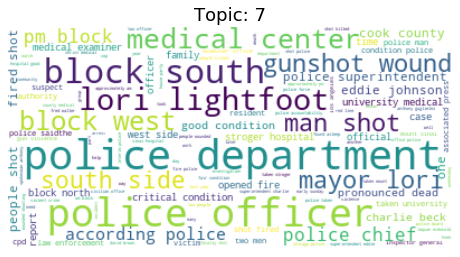

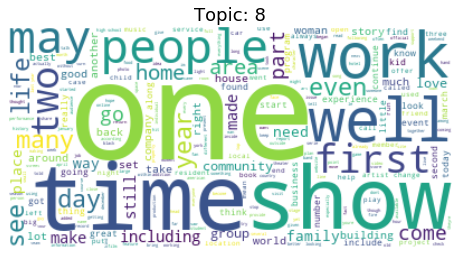

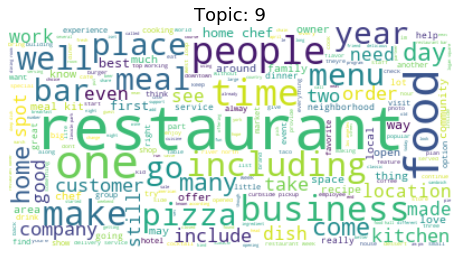

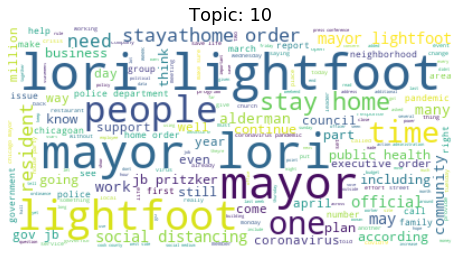

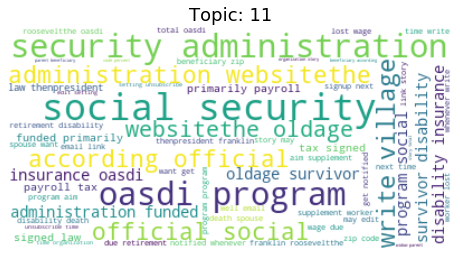

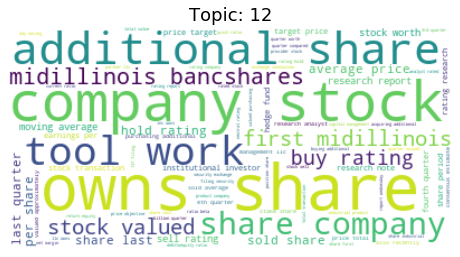

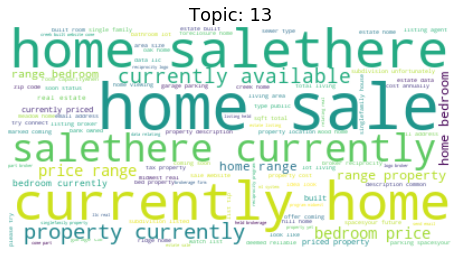

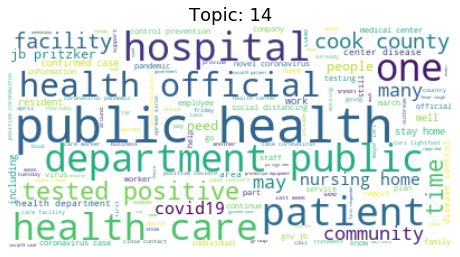

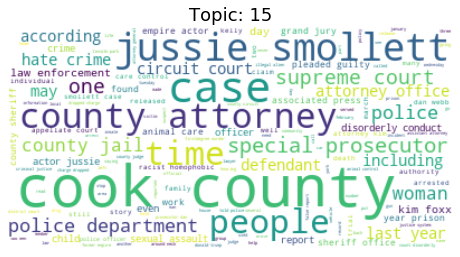

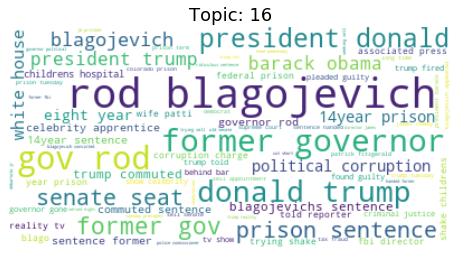

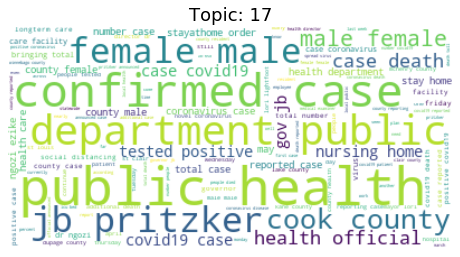

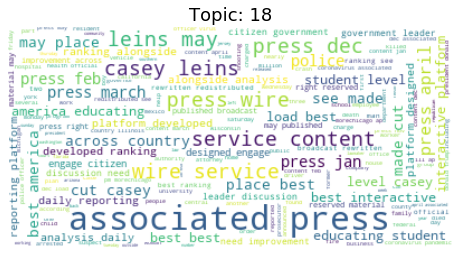

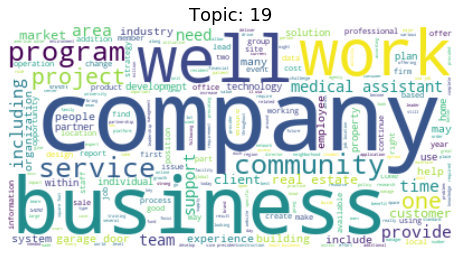

In [132]:
# Create a word cloud for each topic with article text

suppressed_words = ["chicago", "illinois", "news", "new", "state", "city", "said", "say"]

for i in range(len(df.cluster.unique())):
    create_word_cloud(series = df.loc[df.cluster == (i),"text_lemma_clean"], title = f"Topic: {i}", suppressed_words = suppressed_words, figsize = (8,8))
    print("\n\n")

In [161]:
df_clus_top_sent = df[["cluster", "cluster_description", "topic", "tuned_sentiment"]]
df_clus_top_sent["tuned_sentiment"] = df_clus_top_sent["tuned_sentiment"].astype(int)

pd.DataFrame(df_clus_top_sent.groupby(by=['cluster','cluster_description']).mean()["tuned_sentiment"]).sort_values(by="tuned_sentiment")

C:\Users\pnbutler\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


tuned_sentiment
cluster cluster_description                          
7       shootings                    -0.943041       
15      police                       -0.653706       
16      government corruption        -0.463277       
10      law/coronavirus              -0.347590       
18      unknown                      -0.332000       
17      coronavirus deaths           -0.270015       
13      property listings            -0.045593       
14      public health/coronavirus    -0.005424       
4       law/coronavirus               0.001202       
1       taxes                         0.002151       
2       politics/elections            0.121644       
12      business/financial            0.155317       
5       marijuana/legalization        0.194683       
8       parks                         0.208968       
6       education                     0.265220       
19      business opportunities        0.383558       
11      social welfare                0.446629       
3       sports/football and baseball  0.559354       
0       sports/basketball             0.568345       
9       restaurants and food          0.586331

In [162]:
df.cluster.value_counts()

8     14117
1     5114 
19    4148 
3     2662 
14    2581 
4     2495 
7     2493 
6     1659 
15    1646 
10    1473 
17    1374 
5     1279 
2     1192 
9     1112 
0     973  
12    837  
11    356  
16    354  
13    329  
18    250  
Name: cluster, dtype: int64

## Appendix

## TF-IDF Modeling

In [91]:
def tf(word, blob):
    """
    tf(word, blob) computes "term frequency" which is the number of times a word appears in a document blob,
    normalized by dividing by the total number of words in blob. We use TextBlob for breaking up the text into words 
    and getting the word counts.
    """
    return blob.words.count(word) / len(blob.words)

def n_containing(word, bloblist):
    """
    n_containing(word, bloblist) returns the number of documents containing word.
    A generator expression is passed to the sum() function.
    """
    return sum(1 for blob in bloblist if word in blob.words)


def idf(word, bloblist):
    """
    idf(word, bloblist) computes "inverse document frequency" which measures how common a word is
    among all documents in bloblist. The more common a word is, the lower its idf. 
    We take the ratio of the total number of documents to the number of documents containing word, 
    then take the log of that. Add 1 to the divisor to prevent division by zero
    """
    return math.log(len(bloblist) / (1 + n_containing(word, bloblist)))

def tfidf(word, blob, bloblist):
    """
    tfidf(word, blob, bloblist) computes the TF-IDF score. It is simply the product of tf and idf.
    """
    return tf(word, blob) * idf(word, bloblist)

# source: # http://stevenloria.com/finding-important-words-in-a-document-using-tf-idf/

In [100]:
# time the process
tic = time.perf_counter()

bloblist = []
del bloblist[:]

# clean 
df['text_clean_2'] = [clean(doc).split() for doc in df['text_lemma_clean']]


for i  in range(df.shape[0]):
    bloblist.append(TextBlob(str(df['text_clean_2'].iloc[i])))
    
# time the process
toc = time.perf_counter()
print("The process took {} seconds".format(toc - tic))

print("Length of bloblist: {}".format(len(bloblist)))

The process took 6.509659400006058 seconds
Length of bloblist: 29785


In [101]:
# time the process
tic = time.perf_counter()

for i, blob in enumerate(bloblist):
# Print top 5 values
    if i == 5:
        break
    print("Top words in news article {}".format(i + 1))
    scores = {word: tfidf(word, blob, bloblist) for word in blob.words}
    sorted_words = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    for word, score in sorted_words[:10]:
        print("\tWord: {}, TF-IDF: {}".format(word, round(score, 5)))
        
# time the process
toc = time.perf_counter()
print("The process took {} seconds".format(toc - tic)) # this will take too long to do for all documents - moving on to another method to find topics

Top words in news article 1
	Word: 'equestrian, TF-IDF: 0.06072
	Word: 'lady, TF-IDF: 0.05282
	Word: 'wellington, TF-IDF: 0.04765
	Word: 'taxpayerfunded, TF-IDF: 0.03757
	Word: 'family, TF-IDF: 0.03377
	Word: 'wife, TF-IDF: 0.03284
	Word: 'sequester, TF-IDF: 0.02985
	Word: 'mary, TF-IDF: 0.02689
	Word: 'obese, TF-IDF: 0.02601
	Word: 'billionaire, TF-IDF: 0.02563
Top words in news article 2
	Word: 'lesbian, TF-IDF: 0.22561
	Word: 'fricking, TF-IDF: 0.10283
	Word: 'singing, TF-IDF: 0.0832
	Word: 'supportive, TF-IDF: 0.07546
	Word: 'ratingsyou, TF-IDF: 0.05368
	Word: 'hghhghgall, TF-IDF: 0.05368
	Word: 'jds, TF-IDF: 0.05368
	Word: 'batdr, TF-IDF: 0.05368
	Word: 'dctlalso, TF-IDF: 0.05368
	Word: 'headcanons, TF-IDF: 0.05368
Top words in news article 3
	Word: 'developer, TF-IDF: 0.11984
	Word: 'smokestack, TF-IDF: 0.0977
	Word: 'botched, TF-IDF: 0.09475
	Word: 'runoff, TF-IDF: 0.08996
	Word: 'fine, TF-IDF: 0.0734
	Word: 'fridaylast, TF-IDF: 0.06546
	Word: 'statementhilco, TF-IDF: 0.06546
	W